In [6]:
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, cross_validate, learning_curve
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

### Данные:
Будем работать с датасетом [The Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [7]:
from sklearn.datasets import load_iris

In [8]:
data = load_iris()

In [9]:
X, y = data['data'], data['target']

In [254]:
print(np.random.normal(X,1))

[[ 5.24651747e+00  4.41709503e+00  9.42126390e-01 -9.37706675e-01]
 [ 4.98188043e+00  3.00506368e+00  2.30348827e+00  9.81231172e-01]
 [ 5.46111054e+00  1.36978092e+00  4.51478990e-01 -5.00069912e-01]
 [ 4.98007243e+00  9.46124165e-02 -4.27942667e-01  2.03682913e-01]
 [ 4.72798810e+00  3.64426644e+00  1.30396776e-01  2.40340171e-01]
 [ 4.96219310e+00  3.68181906e+00  2.67771505e+00  3.13611620e-01]
 [ 4.31716291e+00  1.68342499e+00 -1.18973571e-01  1.84136953e+00]
 [ 4.94283276e+00  3.56185885e+00  3.65345489e+00  9.64648255e-02]
 [ 3.46343384e+00  4.26777993e+00  1.44987015e+00 -4.48685403e-01]
 [ 4.48990585e+00  2.14065098e+00  7.36527704e-01  4.87035826e-01]
 [ 5.62771360e+00  1.95099200e+00  1.06147923e+00  3.78231065e-01]
 [ 5.31335802e+00  3.19355188e+00  1.49685434e+00  7.76191942e-01]
 [ 3.20236844e+00  2.45324409e+00  1.84152221e+00 -9.48440848e-01]
 [ 4.44398275e+00  3.46929967e+00 -5.20940442e-03 -7.61079840e-01]
 [ 4.97178007e+00  3.56923548e+00  3.63098915e-01  9.76328071e

In [11]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

### Задание:
Будем решать задачу классификации на 3 класса. В качестве модели используется нейронная сеть с одним скрытым слоем. Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа нейронов скрытого слоя. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа нейронов скрытого слоя.

In [12]:
def baseline_model(neurons_number):
    """
    creating model of neural network with input layer (4 input neurons), 
    hidden layer with neurons_number number of neurons and output layer of 3 neurons
    
    Parameters
    ----------
    neurons_number : int
        number of neurons in the hidden layer
    """
    # create model
    model = Sequential()
    model.add(Dense(neurons_number, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
#splitting data for cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [164]:
#calculating accuracy score and standard deviation score for number of neurons in the hidden layer from 2 to 19
import numpy as np
#accuracy score for each number of neurons is stored in accuracy
accuracy = np.array([])
#standard deviation score for each number of neurons is stored in std
std = np.array([])
error = np.array([])
error_std = np.array([])
#number_of_neurons = np.arange(2, 5, 1)
number_of_epochs = np.array([10, 50, 100, 300])


for i in range(len(number_of_epochs)):
    print(i)
    estimator = KerasClassifier(build_fn=baseline_model, neurons_number=6, epochs=int(number_of_epochs[i]), batch_size=5, verbose=0)
    lc = learning_curve(
            estimator, X, dummy_y, cv=kfold, n_jobs=2, train_sizes=np.arange(0.1, 1.1, 0.1))

    train_sizes = lc[0]
    train_scores = lc[1]
    test_scores = lc[2]
    if (i==0):
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
    else:
        train_scores_mean = np.vstack((train_scores_mean, np.mean(train_scores, axis=1)))
        train_scores_std = np.vstack((train_scores_std, np.std(train_scores, axis=1)))
        test_scores_mean = np.vstack((test_scores_mean, np.mean(test_scores, axis=1)))
        test_scores_std = np.vstack((test_scores_std, np.std(test_scores, axis=1)))

0
1
2
3


In [255]:
#noise add
#calculating accuracy score and standard deviation score for number of neurons in the hidden layer from 2 to 19
import numpy as np
#accuracy score for each number of neurons is stored in accuracy
accuracy = np.array([])
#standard deviation score for each number of neurons is stored in std
std = np.array([])
error = np.array([])
error_std = np.array([])
#number_of_neurons = np.arange(2, 5, 1)
number_of_epochs = np.array([10, 50, 100, 300])
noised_X = [X, np.random.normal(X,0.2), np.random.normal(X,0.5), np.random.normal(X,1)]

for i in range(len(noised_X)):
    print(i)
    estimator = KerasClassifier(build_fn=baseline_model, neurons_number=6, epochs=300, batch_size=5, verbose=0)
    lc_n = learning_curve(
            estimator, noised_X[i], dummy_y, cv=kfold, n_jobs=2, train_sizes=np.arange(0.1, 1.1, 0.1))

    train_sizes_n = lc_n[0]
    train_scores_n = lc_n[1]
    test_scores_n = lc_n[2]
    if (i==0):
        train_scores_mean_n = np.mean(train_scores_n, axis=1)
        train_scores_std_n = np.std(train_scores_n, axis=1)
        test_scores_mean_n = np.mean(test_scores_n, axis=1)
        test_scores_std_n = np.std(test_scores_n, axis=1)
    else:
        train_scores_mean_n = np.vstack((train_scores_mean_n, np.mean(train_scores_n, axis=1)))
        train_scores_std_n = np.vstack((train_scores_std_n, np.std(train_scores_n, axis=1)))
        test_scores_mean_n = np.vstack((test_scores_mean_n, np.mean(test_scores_n, axis=1)))
        test_scores_std_n = np.vstack((test_scores_std_n, np.std(test_scores_n, axis=1)))

0
1
2
3


In [165]:
#saving error and error std 
import pickle 
data = train_scores_mean, train_scores_std, test_scores_mean, test_scores_std
with open('irisclassification_epochs.pickle', 'wb') as f:
    pickle.dump(data, f)

with open('irisclassification_epochs.pickle', 'rb') as f:
    train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = pickle.load(f)

In [256]:
#saving noise
import pickle 
data = train_scores_mean_n, train_scores_std_n, test_scores_mean_n, test_scores_std_n
with open('irisclassification_epochs_noised.pickle', 'wb') as f:
    pickle.dump(data, f)

with open('irisclassification_epochs_noised.pickle', 'rb') as f:
    train_scores_mean_n, train_scores_std_n, test_scores_mean_n, test_scores_std_n = pickle.load(f)

In [167]:
train_error = 1 - train_scores_mean
test_error = 1 - test_scores_mean

In [257]:
train_error_n = 1 - train_scores_mean_n
test_error_n = 1 - test_scores_mean_n

/home/stepan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



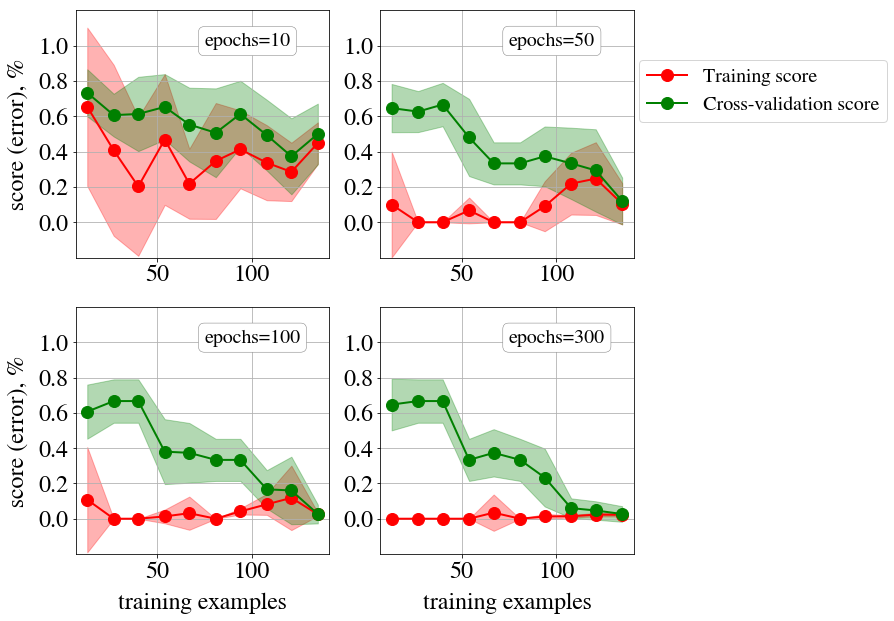

In [277]:
#configuring plot
from matplotlib import pylab as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.figure(figsize=(10, 10))
for j in range(len(number_of_epochs)):
    plt.subplot(2, 2, j+1)
    if not (j%2):
        plt.ylabel('score (error), %', labelpad=10)
    if (j>1):
        plt.xlabel('training examples', labelpad=10)
    y = train_error[j]
    x = train_sizes
    plt.fill_between(x,y-train_scores_std[j],y+train_scores_std[j], alpha=0.3, color='red')
    plt.plot(x, y, c='red', marker='o', label="Training score")
    plt.yticks(np.arange(0, 1.2, step=0.2))
    plt.ylim(-0.2, 1.2)
    plt.grid()
    plt.text(75, 1, 'epochs=%d'%(number_of_epochs[j]), color='black',
                 bbox={'boxstyle': 'round', 'facecolor': 'white', 'linewidth': 0.5, 'edgecolor': 'grey'}, fontsize=20)
for j in range(len(number_of_epochs)):
    plt.subplot(2, 2, j+1)
    y = test_error[j]
    x = train_sizes
    plt.fill_between(x,y-test_scores_std[j],y+test_scores_std[j], alpha=0.3, color='green')
    plt.plot(x, y, c='green', marker='o', label="Cross-validation score")
plt.legend(bbox_to_anchor=(2, 2), loc=1, borderaxespad=0., fontsize=20)
plt.savefig('hw42.png', bbox_inches='tight', dpi=600) 
plt.show()



/home/stepan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



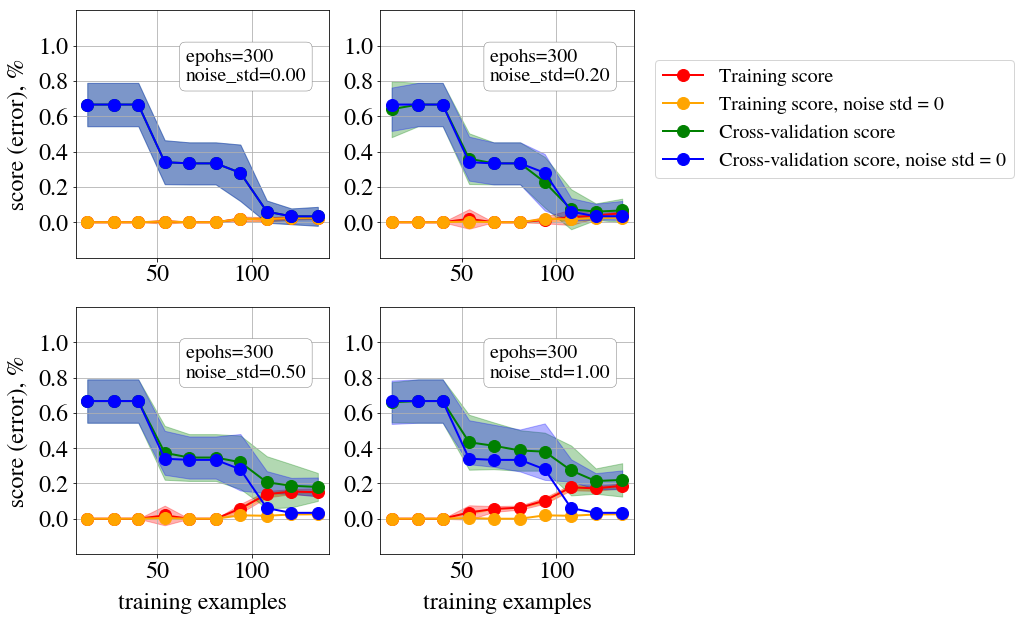

In [282]:
#plotting noised data
noise_std = [0.0, 0.2, 0.5, 1.0]
plt.figure(figsize=(10, 10))
for j in range(len(noised_X)):
    plt.subplot(2, 2, j+1)
    if not (j%2):
        plt.ylabel('score (error), %', labelpad=10)
    if (j>1):
        plt.xlabel('training examples', labelpad=10)
    y = train_error_n[j]
    x = train_sizes_n
    plt.fill_between(x,y-train_scores_std_n[j],y+train_scores_std_n[j], alpha=0.3, color='red')
    plt.plot(x, y, c='red', marker='o', label="Training score")
    plt.fill_between(x,y-train_scores_std_n[0],y+train_scores_std_n[0], alpha=0.3, color='orange')
    plt.plot(x, train_error_n[0], c='orange', marker='o', label="Training score, noise std = 0")
    plt.yticks(np.arange(0, 1.2, step=0.2))
    plt.ylim(-0.2, 1.2)
    plt.grid()
    plt.text(65, 0.8, 'epohs=300 \nnoise_std=%.2f'%(noise_std[j]), color='black',
                 bbox={'boxstyle': 'round', 'facecolor': 'white', 'linewidth': 0.5, 'edgecolor': 'grey'}, fontsize=20)
for j in range(len(noised_X)):
    plt.subplot(2, 2, j+1)
    y = test_error_n[j]
    x = train_sizes_n
    plt.fill_between(x,y-test_scores_std_n[j],y+test_scores_std_n[j], alpha=0.3, color='green')
    plt.plot(x, y, c='green', marker='o', label="Cross-validation score")
    plt.fill_between(x,test_error_n[j]-test_scores_std_n[0],y+test_scores_std_n[0], alpha=0.3, color='blue')
    plt.plot(x, test_error_n[0], c='blue', marker='o', label="Cross-validation score, noise std = 0")
plt.legend(bbox_to_anchor=(2.5, 2), loc=1, borderaxespad=0., fontsize=20)
plt.savefig('hw42noise.png', bbox_inches='tight', dpi=600)
plt.show()

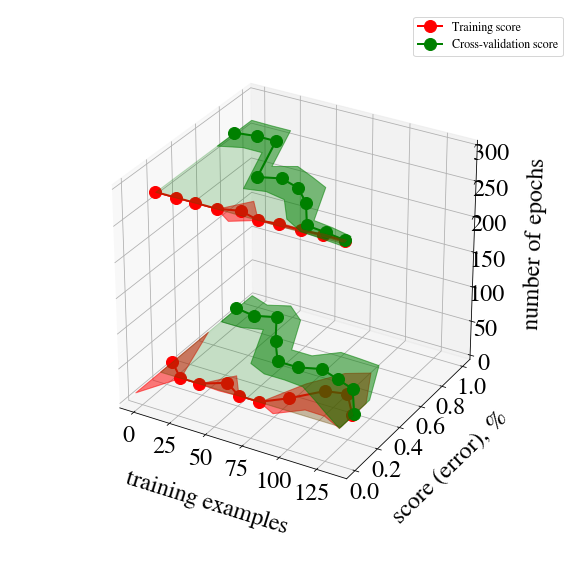

In [219]:
from mpl_toolkits.mplot3d import Axes3D, proj3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib as mpl


mpl.rcParams['legend.fontsize'] = 10



fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
for j in range(len(number_of_epochs)):
    x = train_sizes
    y = train_error[j]
    z = number_of_epochs[j]
    if (j==0 or j==2):
        pass
    else:
        ax.add_collection3d(plt.fill_between(x,y-train_scores_std[j],y+train_scores_std[j], alpha=0.3, color='red'),z, zdir='z')
        ax.add_collection3d(plt.fill_between(x,y,0, alpha=0.1, color='red'),z, zdir='z')
        if (j==len(number_of_epochs)-1):
            ax.plot(x, y, z, c='red', marker='o', label="Training score")
        else:
            ax.plot(x, y, z, c='red', marker='o')
    
for j in range(len(number_of_epochs)):
    x = train_sizes
    y = test_error[j]
    z = number_of_epochs[j]
    if (j==0 or j==2):
        pass
    else:
        ax.add_collection3d(plt.fill_between(x,y-test_scores_std[j],y+test_scores_std[j], alpha=0.3, color='green'),z, zdir='z')
        ax.add_collection3d(plt.fill_between(x,y,0, alpha=0.1, color='green'),z, zdir='z')
        if (j==len(number_of_epochs)-1):
            ax.plot(x, y, z, c='green', marker='o', label="Cross-validation score")
        else:
            ax.plot(x, y, z, c='green', marker='o')


plt.rcParams['legend.fontsize'] = 10
ax.set_xlabel('training examples', labelpad=30)
ax.set_ylabel('score (error), %', labelpad=30)
ax.set_zlabel('number of epochs', labelpad=30)
ax.legend(fontsize=12)
ax.dist = 12
ax.grid()
plt.savefig('hw4.png', bbox_inches='tight', dpi=600) 
plt.show()